Name : W. K. D. D. Senuruk  
## Edges, Corners and Blobs

#### Derivatives of gaussian filter

These are the two partial derivatives of a 2D Gaussian filter

**Derivative with respect to x:** 

$$ \frac{\partial G}{\partial x} = -\frac{x}{2\pi \sigma^4} e^{-\frac{x^2 + y^2}{2\sigma^2}} = -\frac{x}{\sigma^2} G(x, y) $$

**Derivative with respect to y:**

$$ \frac{\partial G}{\partial y} = -\frac{y}{2\pi \sigma^4} e^{-\frac{x^2 + y^2}{2\sigma^2}} = -\frac{y}{\sigma^2} G(x, y) $$

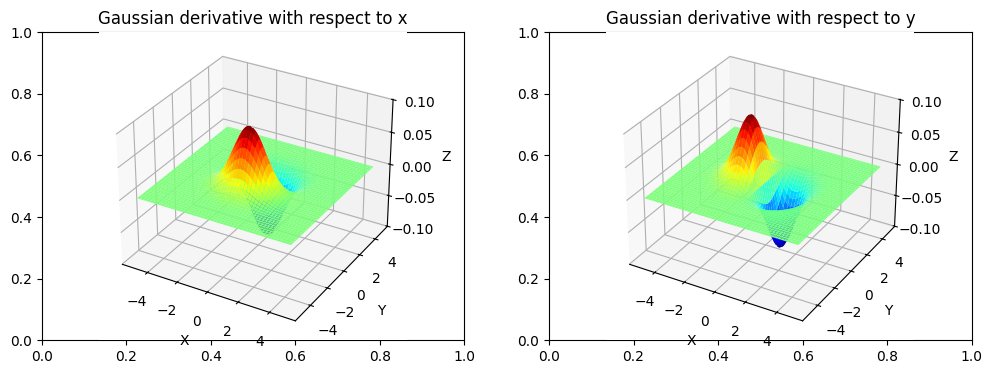

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

sigma = 1
spatial_resolution = 0.1
x = np.arange(-5, 5, spatial_resolution)
y = np.arange(-5, 5, spatial_resolution)
X, Y = np.meshgrid(x, y)
Z = (1/(2*np.pi*sigma**2)*np.exp(-(X**2+Y**2)/(2*sigma**2)))

# creating derivative matrices with respect to x and y
Z_x = - np.reshape(x, (x.shape[0], 1)) * Z
Z_y = - np.reshape(y, (1, y.shape[0])) * Z

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')
surf1 = ax1.plot_surface(X, Y, Z_x, cmap='jet', linewidth=0, antialiased= True)
surf2 = ax2.plot_surface(X, Y, Z_y, cmap='jet', linewidth=0, antialiased= True)
ax1.set_title("Gaussian derivative with respect to x")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax2.set_title("Gaussian derivative with respect to y")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
plt.show()

Derivatives of gaussian using sobel kernals

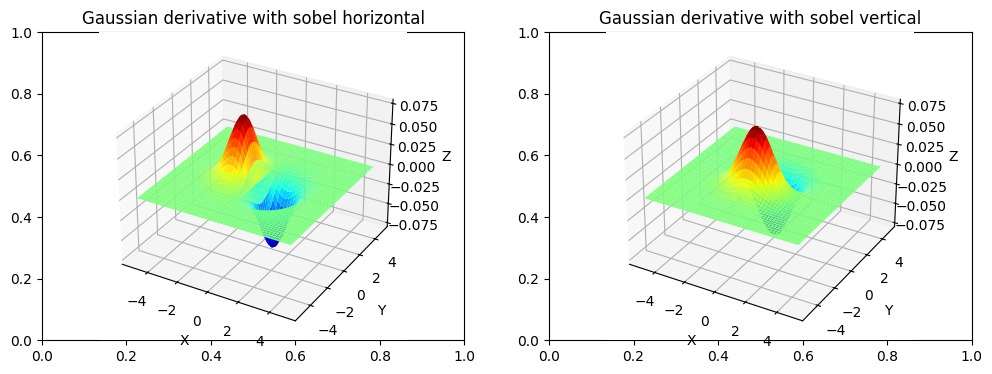

In [85]:
# defining horizontal and vertical sobel kernals
horizontal_sobel_kernal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # enhances vertical lines
vertical_sobel_kernal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # enhances horizontal lines

# cross-correlating gaussian with sobel kernals
horizontal_gaussian_derivative = cv.filter2D(Z, -1, horizontal_sobel_kernal)
vertical_gaussian_derivative = cv.filter2D(Z, -1, vertical_sobel_kernal)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')
surf1 = ax1.plot_surface(X, Y, horizontal_gaussian_derivative, cmap='jet', linewidth=0, antialiased= True)
surf2 = ax2.plot_surface(X, Y, vertical_gaussian_derivative, cmap='jet', linewidth=0, antialiased= True)
ax1.set_title("Gaussian derivative with sobel horizontal")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax2.set_title("Gaussian derivative with sobel vertical")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
plt.show()

#### Harris Corners

Let's use the OpenCV's existing function for Harris corners to detect corners in an image

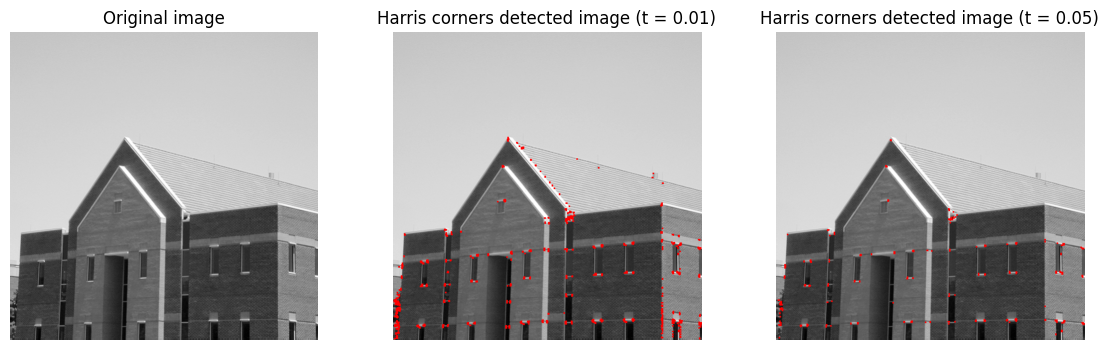

In [99]:
img = cv.imread(r'./Images/building.tif')
img_1 = img.copy()
img_2 = img.copy()
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

# using OpenCV's existing function for harris corners
dst = cv.cornerHarris(img_gray, blockSize=2, ksize=3, k=0.04)
dst = cv.dilate(dst, None)

# threshold for an optimal value
img_1[dst > 0.01 * dst.max()] = [0, 0, 255] # t = 0.01
img_2[dst > 0.05 * dst.max()] = [0, 0, 255] # t = 0.05

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
ax[1].set_title("Harris corners detected image (t = 0.01)")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
ax[2].set_title("Harris corners detected image (t = 0.05)")
ax[2].axis("off")
plt.show()

#### My own implementation for detecting Harris corners

1. **Compute image gradients:**

$$
I_x = \frac{\partial I}{\partial x}, \quad I_y = \frac{\partial I}{\partial y}
$$

2. **Form the structure tensor (second moment matrix):**

$$
M = \begin{bmatrix}
I_x^2 & I_x I_y \\
I_x I_y & I_y^2
\end{bmatrix}
$$

3. **Compute the corner response function \( R \):**

$$
R = \det(M) - k \cdot (\text{trace}(M))^2
$$

$$
\det(M) = \lambda_1 \lambda_2, \quad \text{trace}(M) = \lambda_1 + \lambda_2
$$

4. **Threshold the response \( R \) to classify points:**

$$
R > 0 \Rightarrow \text{Corner}, \quad
R < 0 \Rightarrow \text{Edge}, \quad
R \approx 0 \Rightarrow \text{Flat region}
$$


In [ ]:
img_x = cv.filter2D(img, -1, vertical_sobel_kernal)
img_y = cv.filter2D(img, -1, horizontal_sobel_kernal)

